Chapter 3: Hands on machine learning, Classification

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
import matplotlib.pyplot as plt

In [8]:
some_digit = X[6]
some_digit_image = some_digit.reshape(28, 28)

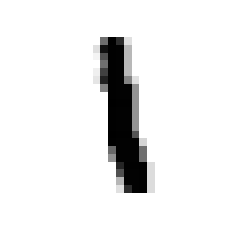

In [9]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [10]:
y[6] #confirm that it is '1'

'1'

In [11]:
y = y.astype(np.uint8) #convert from string to int

In [12]:
#Create test and train sets

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
#creating a target vector for classification: like hot-dog/not hot-dog, but for the number 1
y_train_1 = (y_train == 1) # true for all pictures that are 1, false for everything else
y_test_1 = (y_test == 1) 

## Ask Jake about this... 

In [14]:
from sklearn.linear_model import SGDClassifier #Stochastic Gradient Decent

In [15]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_1)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
some_digit = X[6]

In [17]:
sgd_clf.predict([some_digit])

array([ True])

In [18]:
## Measuring accuracy with cross validation

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_1, cv=3, scoring='accuracy')

array([0.9878 , 0.98095, 0.99005])

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [21]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)


for train_index, test_index in skfolds.split(X_train, y_train_1):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_1[train_index]
    X_test_fold =X_train[test_index]
    y_test_fold = y_train_1[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9878
0.98095
0.99005


In [22]:
from sklearn.base import BaseEstimator

class Never1Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [23]:
never_1_clf = Never1Classifier()
cross_val_score(never_1_clf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.88595, 0.8859 , 0.89105])

In [25]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3)

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_1, y_train_pred)

array([[52917,   341],
       [  483,  6259]])

In [29]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_1, y_train_pred)

0.9483333333333334

In [30]:
recall_score(y_train_1, y_train_pred)

0.9283595372293089

In [31]:
#compute F1 score: harmonic mean of recall and percision 

from sklearn.metrics import f1_score
f1_score(y_train_1, y_train_pred)

0.9382401439064609

In [32]:
# digging into the threshold

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([14583.21846657])

In [36]:
threshold = 15000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [39]:
# cross validation to return the classifer scores. Trying to figure out what the best threshold is. 

y_scores = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3, method='decision_function')


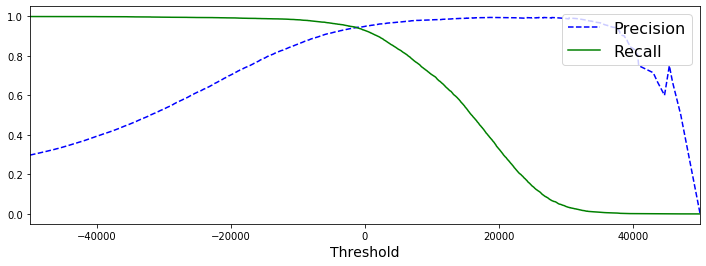

In [59]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(12, 4))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.legend(loc='upper right', fontsize = 16)
    plt.xlabel('Threshold', fontsize = 14)
    plt.xlim(left=-50000, right=50000)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [68]:
def plot_precision_vs_recall(precisions, recalls):
    plt.figure(figsize=(12, 4))
    plt.plot(recalls, precisions,label='Precision')
    plt.legend(loc='upper right', fontsize = 16)
    plt.xlabel('Recall', fontsize = 14)


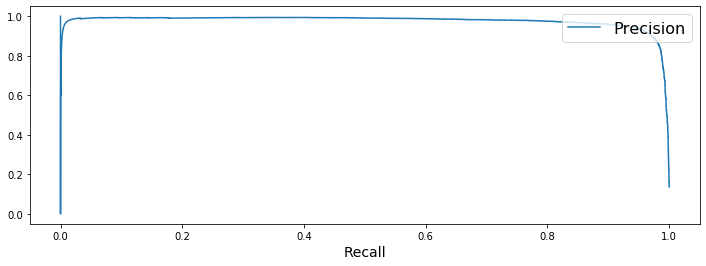

In [69]:
plot_precision_vs_recall(precisions, recalls)
plt.show()